# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
from scipy.stats import linregress

# Import API key
from config import APIkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# ListS for lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# API Key
api_key = APIkey

# URL for Weather Map api
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + api_key

In [5]:
# Counter for city number below
number = 1

# Lists for data
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

#Loop through each city for data and print result
print('------------------------------')
print('Beginning Data Retrieval')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

210 of 601 complete. | Added chokurdakh
City number 211 of 601 complete. | Added ixtapa
City number 212 of 601 complete. | Added kavieng
City number 213 of 601 complete. | Added sao jose de mipibu
City number 214 of 601 complete. | Added morondava
City number 215 of 601 complete. | Added saldanha
City number 216 of 601 complete. | Added kremenchuk
City number 217 of 601 complete. | Added souillac
City number 218 of 601 complete. | Added saint-leu
City number 219 of 601 complete. | Added greymouth
City number 220 of 601 complete. | Added eau claire
City number 221 of 601 complete. | Added kempele
City number 222 of 601 complete. | Added fortuna
City number 223 of 601 complete. | Added narsaq
City number 224 of 601 complete. | Added fallon
City number 225 of 601 complete. | Added sambava
City number 226 of 601 complete. | Added lasa
City number 227 of 601 complete. | Added alvdal
City number 228 of 601 complete. | Added wenling
City number 229 of 601 complete. | Added itaberaba
City numb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dataframe
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.count()


City           553
Latitude       553
Longitude      553
Temperature    553
Humidity       553
Cloudiness     553
Wind Speed     553
dtype: int64

In [7]:
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})


# Export the City_Data into a csv
pd.DataFrame.to_csv(city_data_df, 'city_data.csv')

city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,78.22,15.64,17.60,61,40,8.05
1,Santa María del Oro,25.93,-105.37,66.00,53,31,5.64
2,Vardø,70.37,31.11,34.03,87,83,13.73
3,Punta Arenas,-53.15,-70.92,42.40,100,90,1.97
4,Hithadhoo,-0.60,73.08,85.19,74,92,10.76


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

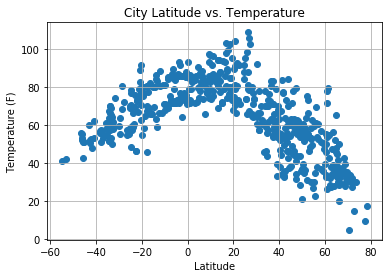

In [8]:
#Plot latitude vs temperature and save
plt.scatter(city_data_df['Latitude'], city_data_df['Temperature'])
plt.title(f'City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('lat_temp.png', bbox_inches='tight')


## Latitude vs. Humidity Plot

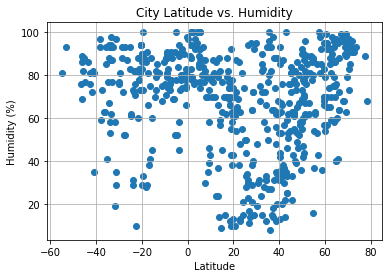

In [8]:
#Plot latitude vs humidity and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Humidity'])
plt.title(f'City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('lat_humid.png', bbox_inches='tight')



## Latitude vs. Cloudiness Plot

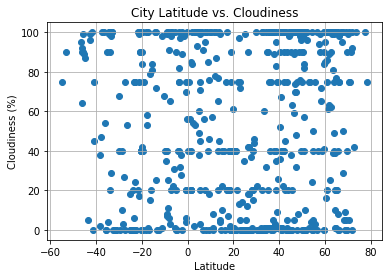

In [9]:
#Plot latitude vs cloudiness and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Cloudiness'])
plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('lat_cloud.png', bbox_inches='tight')



## Latitude vs. Wind Speed Plot

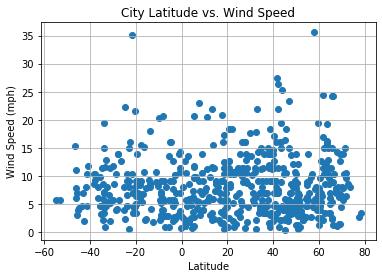

In [10]:
#Plot latitude vs wind speed and save as .png
plt.scatter(city_data_df['Latitude'], city_data_df['Wind Speed'])
plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('lat_wind.png', bbox_inches='tight')



## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) > 0, :]
southern_df = city_data_df.loc[pd.to_numeric(city_data_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.89x + 94.66
The r-squared is: -0.8631622626087773


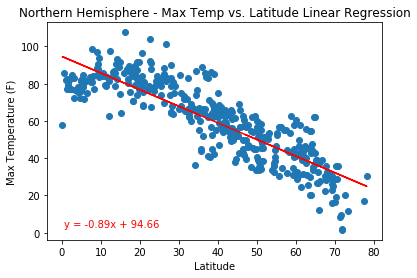

In [29]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.5,3),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.71x + 83.64
The r-squared is: 0.8415132312452578


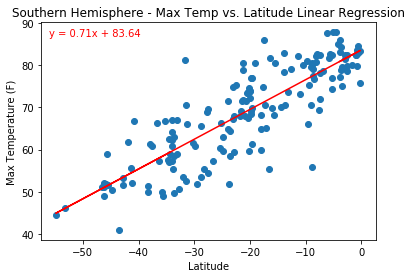

In [28]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Temperature']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,87),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 59.04
The r-squared is: 0.14114033395974857


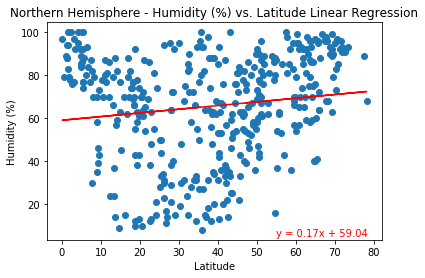

In [26]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,5),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 76.02
The r-squared is: 0.021004363750539632


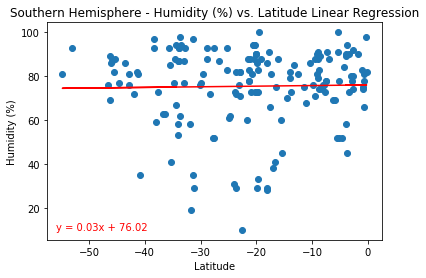

In [21]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

Regression line equation is: y = 0.3x + 37.73
The r-squared is: 0.15044901436126334


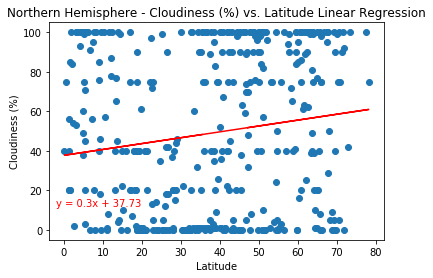

In [35]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-2,12),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.34x + 45.39
The r-squared is: -0.1149394278121224


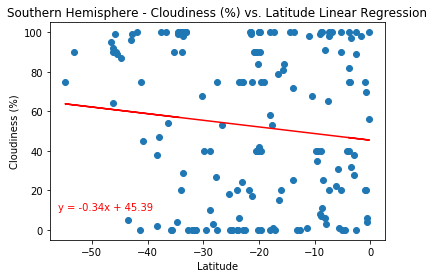

In [47]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 7.68
The r-squared is: 0.031733756202298236
The regression does not display much of a correlation between the data sets.


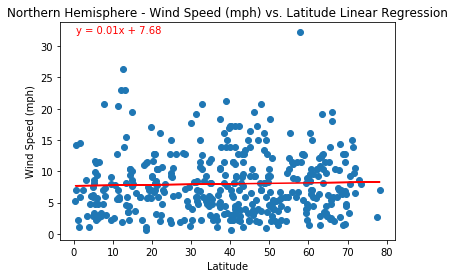

In [67]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.5,32),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.01x + 7.67
The r-squared is: -0.014629153946224532


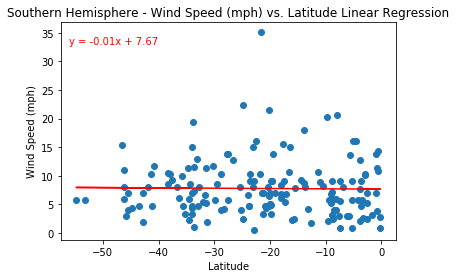

In [50]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,33),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
plt.show()